In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '232491d545fe4963bbecf0523194e098')

In [4]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [5]:
results = search_images_bing(key, 'new balance')
print(results[0])
ims = results.attrgot('content_url')
print(ims[0])
len(ims)

{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=new+balance&id=1D1868AFFD88273DBD203626261A2FFC1CD9F84A&simid=608004632875981039', 'name': 'New Balance 880v10 Performance Review » Believe in the Run', 'thumbnailUrl': 'https://tse2.mm.bing.net/th?id=OIP.HLV41nJcd7AsAVzztAtFXAEsDI&pid=Api', 'datePublished': '2020-02-20T21:05:00.0000000Z', 'isFamilyFriendly': True, 'contentUrl': 'https://www.believeintherun.com/wp-content/uploads/2020/02/new-balance-880v10-feature.jpg', 'hostPageUrl': 'https://www.believeintherun.com/2020/02/20/new-balance-880v10-performance-review/', 'contentSize': '486703 B', 'encodingFormat': 'jpeg', 'hostPageDisplayUrl': 'https://www.believeintherun.com/2020/02/20/new-balance-880v10-performance-review', 'width': 1200, 'height': 801, 'hostPageDiscoveredDate': '2020-02-20T00:00:00.0000000Z', 'thumbnail': {'width': 300, 'height': 200}, 'imageInsightsToken': 'ccid_HLV41nJc*cp_E10FC599DCE6A622B0BF6F102955FD02*mid_1D1868AFFD88273DBD203626261

150

In [6]:
nb_types = '1500','670','577', '1300'
path = Path('newbalance')

In [7]:
if not path.exists():
    path.mkdir()
    for o in nb_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'new balance {o}')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [8]:
fns = get_image_files(path)
fns

(#567) [Path('newbalance/1300/00000000.jpg'),Path('newbalance/1300/00000001.jpg'),Path('newbalance/1300/00000002.jpg'),Path('newbalance/1300/00000003.jpg'),Path('newbalance/1300/00000004.jpg'),Path('newbalance/1300/00000005.jpg'),Path('newbalance/1300/00000006.jpg'),Path('newbalance/1300/00000007.jpg'),Path('newbalance/1300/00000008.jpg'),Path('newbalance/1300/00000009.jpg')...]

In [9]:
failed = verify_images(fns)
failed

(#0) []

In [10]:
failed.map(Path.unlink);

In [11]:
??verify_images

In [12]:
nbs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = nbs.dataloaders(path)

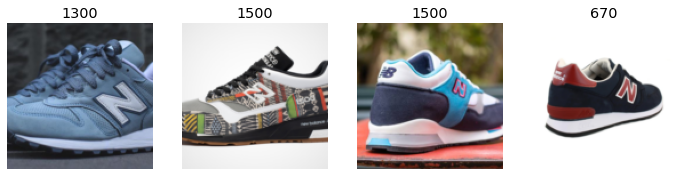

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

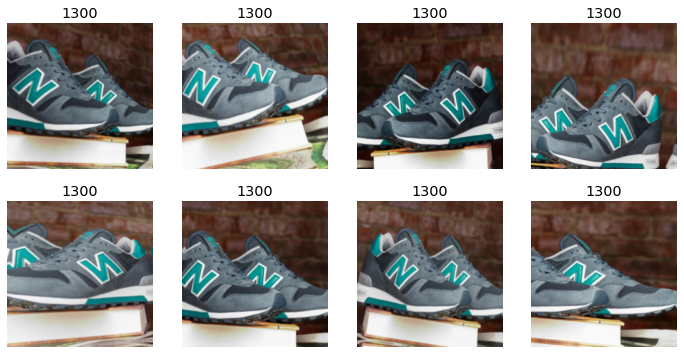

In [17]:
nbs = nbs.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = nbs.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [18]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.354551,1.280238,0.469027,00:08


epoch,train_loss,valid_loss,error_rate,time
0,1.563666,0.961756,0.415929,00:09
1,1.292613,0.765461,0.292035,00:09
2,1.050923,0.647564,0.238938,00:10
3,0.895667,0.609621,0.221239,00:10


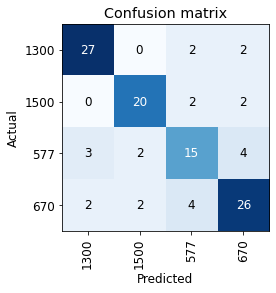

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

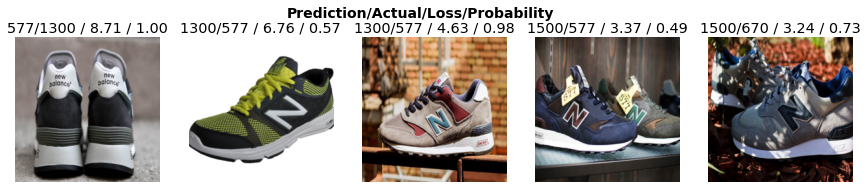

In [20]:
interp.plot_top_losses(5, nrows=1)

In [21]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [22]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [23]:
learn.export()

In [24]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [25]:
learn_inf = load_learner(path/'export.pkl')

In [26]:
learn_inf.predict('images/nb.jpg')

('577', TensorImage(2), TensorImage([0.0251, 0.0547, 0.7300, 0.1902]))

In [27]:
learn_inf.dls.vocab

['1300', '1500', '577', '670']

In [38]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [39]:
img = PILImage.create(btn_upload.data[-1])

In [40]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [41]:
pred,pred_idx,probs = learn_inf.predict(img)

In [42]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: 1500; Probability: 0.9974')

In [43]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [44]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [45]:
btn_upload = widgets.FileUpload()

In [46]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [47]:
    !pip install voila


     |████████████████████████████████| 2.5 MB 16.4 MB/s eta 0:00:01
     |████████████████████████████████| 374 kB 71.6 MB/s eta 0:00:01
     |████████████████████████████████| 552 kB 69.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 9.9 MB/s  eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

nbdev 1.1.5 requires nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.


In [48]:
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /opt/conda/envs/fastai/etc/jupyter
    - Validating...
      voila 0.2.7 OK
